<a href="https://colab.research.google.com/github/Nayan-Bebale/DeepLearningForComputerVision/blob/main/SecondHandCarsPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second Hand Cars Price Prediction

**Machine Learning Life Cycle**
1. Task Understanding
2. Data Prepration
3. Modeling
4. Error Mesurement
5. Training and Optimization
6. Performance Measuring
7. Validation and Testing
8. Corrective Measures

In [ ]:
1+1

2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

## 1. Task Undestanding

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DeepLearning_For_Computer_Vision/second_hand_cars_dataset.csv")

In [ ]:
df.head(2)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5


In [ ]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


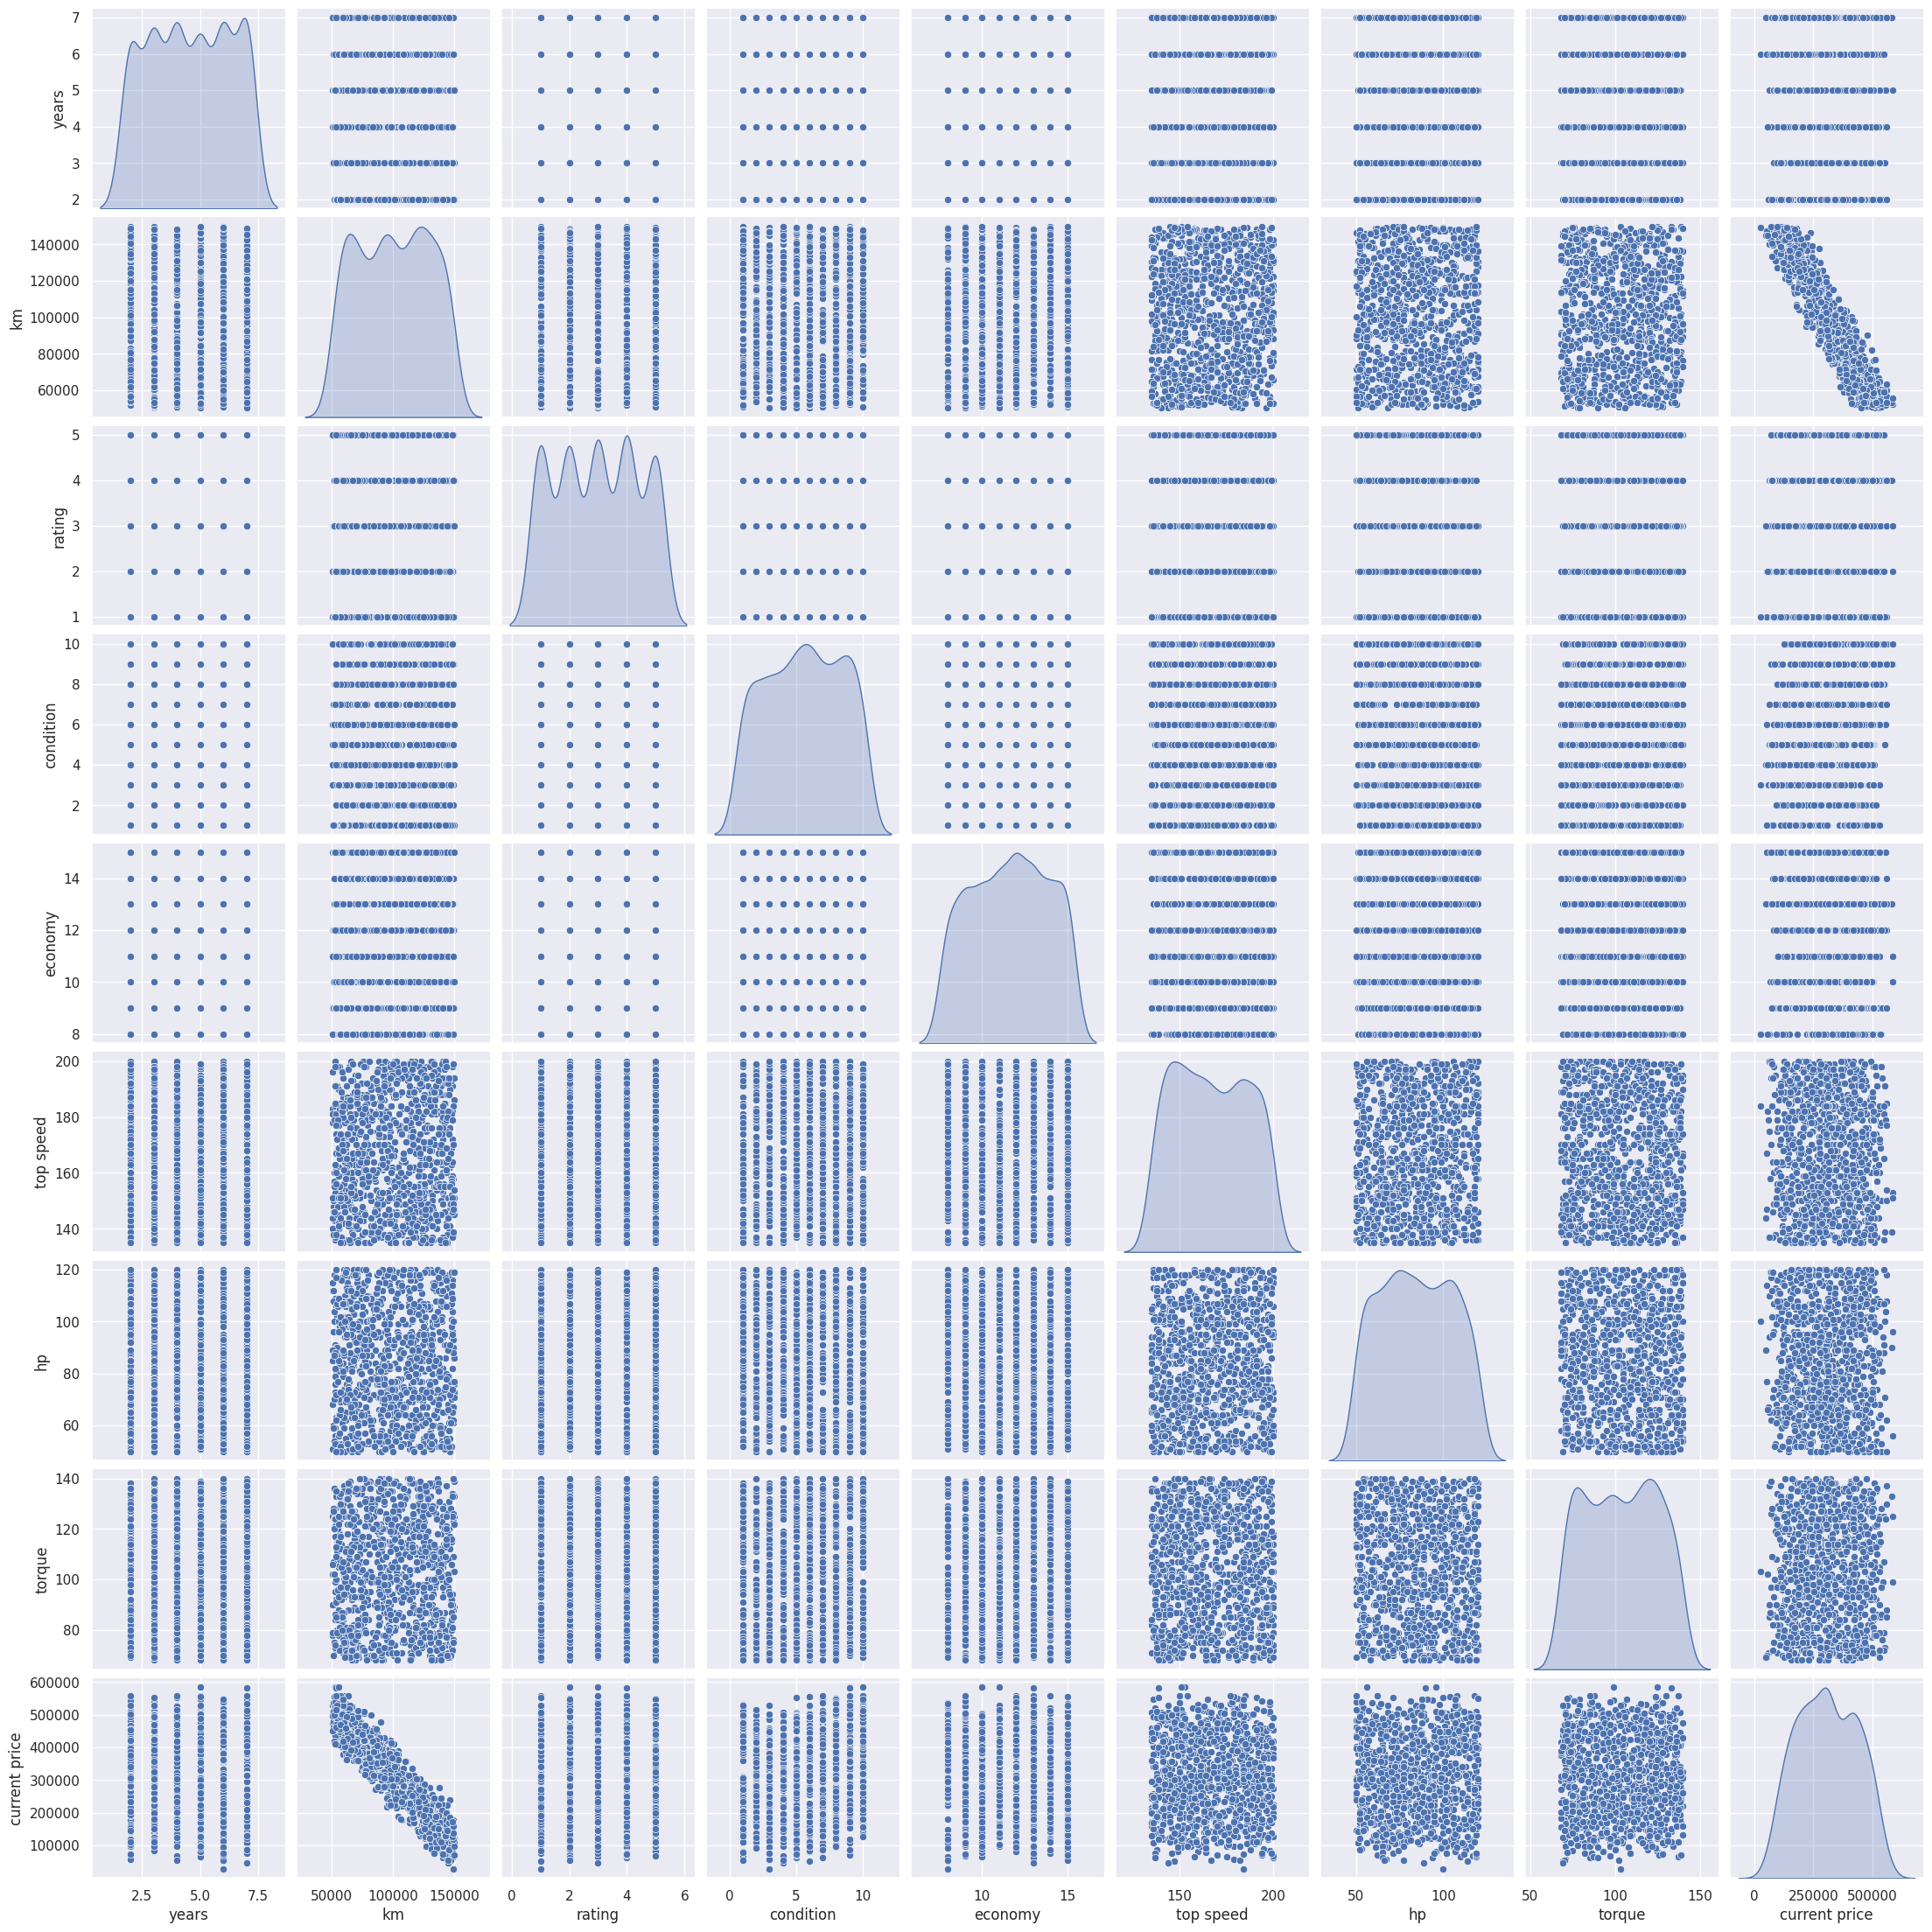

In [ ]:
sns.pairplot(df[["years",	"km",	"rating",	"condition",	"economy",	"top speed",	"hp",	"torque",	"current price"]], diag_kind='kde')

## Data Prepration

In [ ]:
tensor_df = tf.constant(df)
tensor_df = tf.cast(tensor_df, tf.float32)
print(tensor_df)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tf_data = tf.random.shuffle(tensor_df)
print(tf_data)

tf.Tensor(
[[7.730000e+02 6.913810e+05 8.567710e+05 ... 7.900000e+01 9.900000e+01
  3.145235e+05]
 [4.910000e+02 6.531150e+05 8.284520e+05 ... 6.800000e+01 1.330000e+02
  3.029295e+05]
 [9.470000e+02 5.082420e+05 7.754110e+05 ... 1.000000e+02 6.900000e+01
  4.017450e+05]
 ...
 [7.510000e+02 6.716300e+05 8.458890e+05 ... 9.700000e+01 1.140000e+02
  4.600195e+05]
 [3.350000e+02 5.533510e+05 7.470140e+05 ... 8.700000e+01 7.000000e+01
  3.159145e+05]
 [8.980000e+02 5.819500e+05 7.397220e+05 ... 1.010000e+02 1.010000e+02
  1.100215e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
X = tf_data[:, 3:-1]
X.shape

TensorShape([1000, 8])

In [ ]:
y = tf_data[:, -1]         # last column as target
y = tf.expand_dims(y, -1)  # shape (1000, 1)
y.shape

TensorShape([1000, 1])

In [ ]:
print(len(X), len(y))
print(X.shape, y.shape)

1000 1000
(1000, 8) (1000, 1)


In [ ]:
normalizer = Normalization(axis=-1, mean=5, variance=4)
x_normalized = tf.constant([[3, 4, 5, 6, 7],
                            [4, 5, 6, 7, 8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [ ]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194926 ,  0.43278465, -1.417883  , -0.91816026,  1.065293  ,
        -0.5650271 , -0.27044833, -0.21013671],
       [-0.90849847,  0.31663918, -0.70466214, -1.2723887 , -0.28034025,
        -0.92812157, -0.80685884,  1.4052044 ],
       [-0.32650068, -1.3508235 , -1.417883  ,  0.14452522, -0.72888464,
        -0.8243803 ,  0.75360817, -1.6354377 ],
       [-0.32650068, -0.8234327 ,  0.00855871,  1.2072107 ,  0.16820414,
         1.6135396 , -0.6605651 , -1.4929076 ],
       [ 0.83749485, -0.35895386, -1.417883  , -0.20970327,  0.16820414,
         0.16116178, -1.3432693 , -1.4929076 ]], dtype=float32)>

In [ ]:
print(X[:5])

tf.Tensor(
[[7.00000e+00 1.12884e+05 1.00000e+00 3.00000e+00 1.40000e+01 1.56000e+02
  7.90000e+01 9.90000e+01]
 [3.00000e+00 1.09500e+05 2.00000e+00 2.00000e+00 1.10000e+01 1.49000e+02
  6.80000e+01 1.33000e+02]
 [4.00000e+00 6.09170e+04 1.00000e+00 6.00000e+00 1.00000e+01 1.51000e+02
  1.00000e+02 6.90000e+01]
 [4.00000e+00 7.62830e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.98000e+02
  7.10000e+01 7.20000e+01]
 [6.00000e+00 8.98160e+04 1.00000e+00 5.00000e+00 1.20000e+01 1.70000e+02
  5.70000e+01 7.20000e+01]], shape=(5, 8), dtype=float32)


## Modeling (Linear Regression Model)

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
start_val = int(DATASET_SIZE * TRAIN_RATIO)
end_val   = int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))

X_train, y_train = X[:start_val], y[:start_val]
X_val,   y_val   = X[start_val:end_val], y[start_val:end_val]
X_test,  y_test  = X[end_val:], y[end_val:]

In [ ]:
# X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
# y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
# print(X_train.shape, y_train.shape)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
for x, y in train_dataset:
  print(x, y)
  break

tf.Tensor(
[[6.00000e+00 8.98160e+04 1.00000e+00 5.00000e+00 1.20000e+01 1.70000e+02
  5.70000e+01 7.20000e+01]
 [7.00000e+00 6.19100e+04 5.00000e+00 4.00000e+00 1.00000e+01 1.62000e+02
  1.13000e+02 1.06000e+02]
 [6.00000e+00 1.28355e+05 2.00000e+00 4.00000e+00 1.40000e+01 1.85000e+02
  5.30000e+01 1.00000e+02]
 [4.00000e+00 1.12378e+05 3.00000e+00 7.00000e+00 1.20000e+01 1.35000e+02
  6.00000e+01 1.14000e+02]
 [3.00000e+00 1.09500e+05 2.00000e+00 2.00000e+00 1.10000e+01 1.49000e+02
  6.80000e+01 1.33000e+02]
 [4.00000e+00 7.83140e+04 2.00000e+00 3.00000e+00 1.50000e+01 1.88000e+02
  6.50000e+01 1.38000e+02]
 [7.00000e+00 5.90970e+04 4.00000e+00 1.00000e+00 1.30000e+01 1.68000e+02
  8.90000e+01 1.27000e+02]
 [2.00000e+00 8.97380e+04 1.00000e+00 9.00000e+00 1.50000e+01 1.87000e+02
  8.10000e+01 1.14000e+02]
 [3.00000e+00 7.63630e+04 4.00000e+00 8.00000e+00 8.00000e+00 1.52000e+02
  1.15000e+02 8.40000e+01]
 [2.00000e+00 1.06506e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.74000e+02
  1.06

In [ ]:
# start_val = int(DATASET_SIZE * TRAIN_RATIO)
# end_val   = int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))

# X_val = X[start_val:end_val]
# y_val = y[start_val:end_val]

print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


In [ ]:
print(X.shape, y.shape)
print(X_val.shape, y_val.shape)


(1000, 8) (32, 1)
(100, 8) (100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
# y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]

# print(X_test.shape, y_test.shape)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

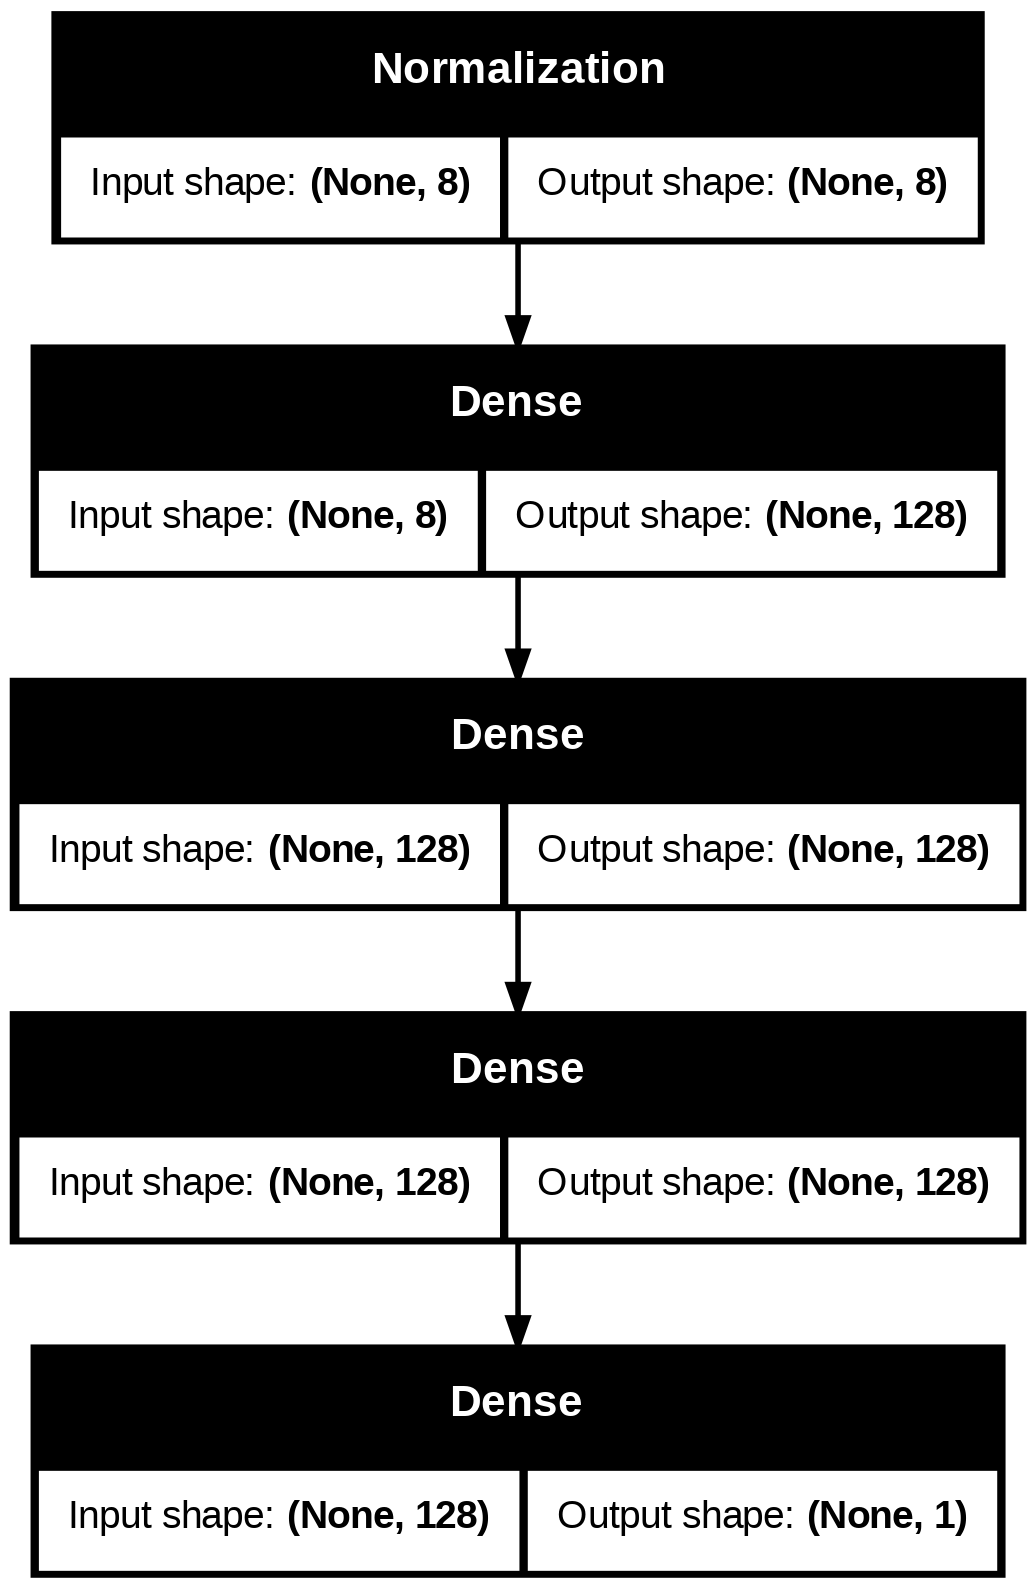

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Error Mearsurment

There are three functions in it.

1. MeanSquaredError()
2. Huber()
3. MeanAbsoluteError()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

## Training and Optimization

Learning Rate starts from **0.01, 0.001, 0.0001 to 0.(01)^10**

In [ ]:
history = model.fit(train_dataset,validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 230393.9375 - root_mean_squared_error: 267935.3125 - val_loss: 52718.2305 - val_root_mean_squared_error: 69610.6719
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53007.0586 - root_mean_squared_error: 65066.4102 - val_loss: 53938.8594 - val_root_mean_squared_error: 67799.1328
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47192.2617 - root_mean_squared_error: 58830.9336 - val_loss: 42658.8242 - val_root_mean_squared_error: 54152.5078
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47727.4922 - root_mean_squared_error: 59369.2891 - val_loss: 56891.9609 - val_root_mean_squared_error: 71649.5469
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64977.7109 - root_mean_squared_error: 81720.0000 - val_loss: 43844.0547 - val_root_mean_squared_error: 55513.0039
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41224.1836 - root_mean_squared_error: 51112.4648 - val_loss: 54421.5586 -

In [ ]:
history.history

{'loss': [151201.953125,
  50766.76953125,
  46280.99609375,
  55539.82421875,
  59232.21484375,
  41550.49609375,
  43796.64453125,
  46225.06640625,
  45041.69921875,
  38906.44140625,
  39758.89453125,
  41182.921875,
  46166.9765625,
  48669.359375,
  44509.69140625,
  42048.8046875,
  39580.67578125,
  41772.8984375,
  42592.48046875,
  40585.51171875,
  38440.68359375,
  40196.38671875,
  42564.5,
  45366.58984375,
  48084.55859375,
  41219.46484375,
  36703.1171875,
  35650.8984375,
  38586.58984375,
  39000.3515625,
  37481.12109375,
  41183.8359375,
  40045.2109375,
  37784.74609375,
  40620.30859375,
  45155.84375,
  37657.3203125,
  39662.11328125,
  42589.73828125,
  40180.96484375,
  36683.94921875,
  36984.09375,
  36894.74609375,
  37353.30859375,
  37183.84375,
  37544.05078125,
  36604.57421875,
  37008.09375,
  37604.734375,
  40388.30078125,
  43674.0546875,
  39427.93359375,
  35630.36328125,
  37568.44140625,
  35160.79296875,
  34474.8046875,
  35115.9140625,
  36

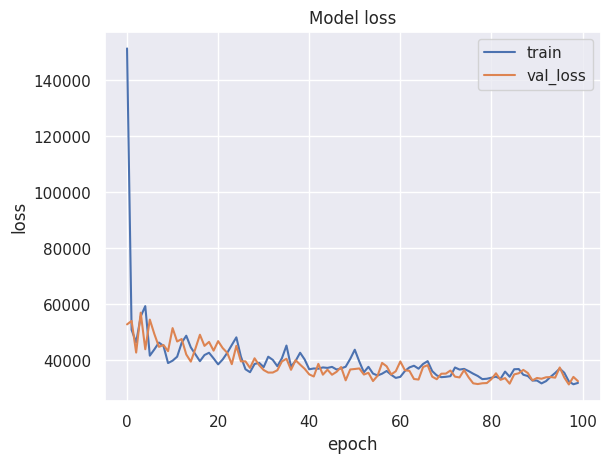

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'val_loss'])
plt.show()

## Performance Measurement

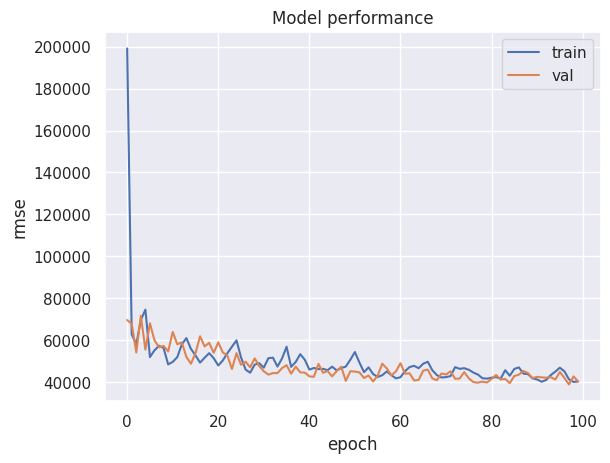

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("Model performance")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32552.3516 - root_mean_squared_error: 40609.9336


[32448.162109375, 40307.08984375]

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40594.9453 - root_mean_squared_error: 48680.5391 


[41019.26171875, 49204.3203125]

In [ ]:
model.predict(X_test).shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


(100, 1)

In [ ]:
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[474461.72],
       [186611.44],
       [448015.47],
       [415198.97],
       [377508.6 ],
       [363401.44],
       [360004.38],
       [352399.22],
       [209450.11],
       [132292.69],
       [396629.75],
       [329360.4 ],
       [311522.1 ],
       [528755.3 ],
       [381227.6 ],
       [324590.9 ],
       [508033.84],
       [107671.22],
       [140342.98],
       [123969.86],
       [495131.06],
       [191135.19],
       [489928.16],
       [118249.57],
       [214407.73],
       [235188.77],
       [181309.34],
       [490730.88],
       [457818.7 ],
       [331747.97],
       [454738.53],
       [482443.28],
       [494817.97],
       [222394.98],
       [493084.66],
       [437029.38],
       [503138.1 ],
       [462894.4 ],
       [397558.53],
       [175743.48],
       [158404.42],
       [469999.16],
       [205780.86],
       [374575.22],
       [538628.06],
       [157541.17],
       [219471.39],
       [288860.16],
       [147928.66],
       [242997.58],


In [ ]:
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[474461.72]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([414938.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:, 0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:, 0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[np.float32(474461.72), np.float32(186611.44), np.float32(448015.47), np.float32(415198.97), np.float32(377508.6), np.float32(363401.44), np.float32(360004.38), np.float32(352399.22), np.float32(209450.11), np.float32(132292.69), np.float32(396629.75), np.float32(329360.4), np.float32(311522.1), np.float32(528755.3), np.float32(381227.6), np.float32(324590.9), np.float32(508033.84), np.float32(107671.22), np.float32(140342.98), np.float32(123969.86), np.float32(495131.06), np.float32(191135.19), np.float32(489928.16), np.float32(118249.57), np.float32(214407.73), np.float32(235188.77), np.float32(181309.34), np.float32(490730.88), np.float32(457818.7), np.float32(331747.97), np.float32(454738.53), np.float32(482443.28), np.float32(494817.97), np.float32(222394.98), np.float32(493084.66), np.float32(437029.38), np.float32(503138.1), np.float32(462894.4), np.float32(397558.53), np.float32(175743.48), np.float32(158404.42), np.float32(469999.16), np.f

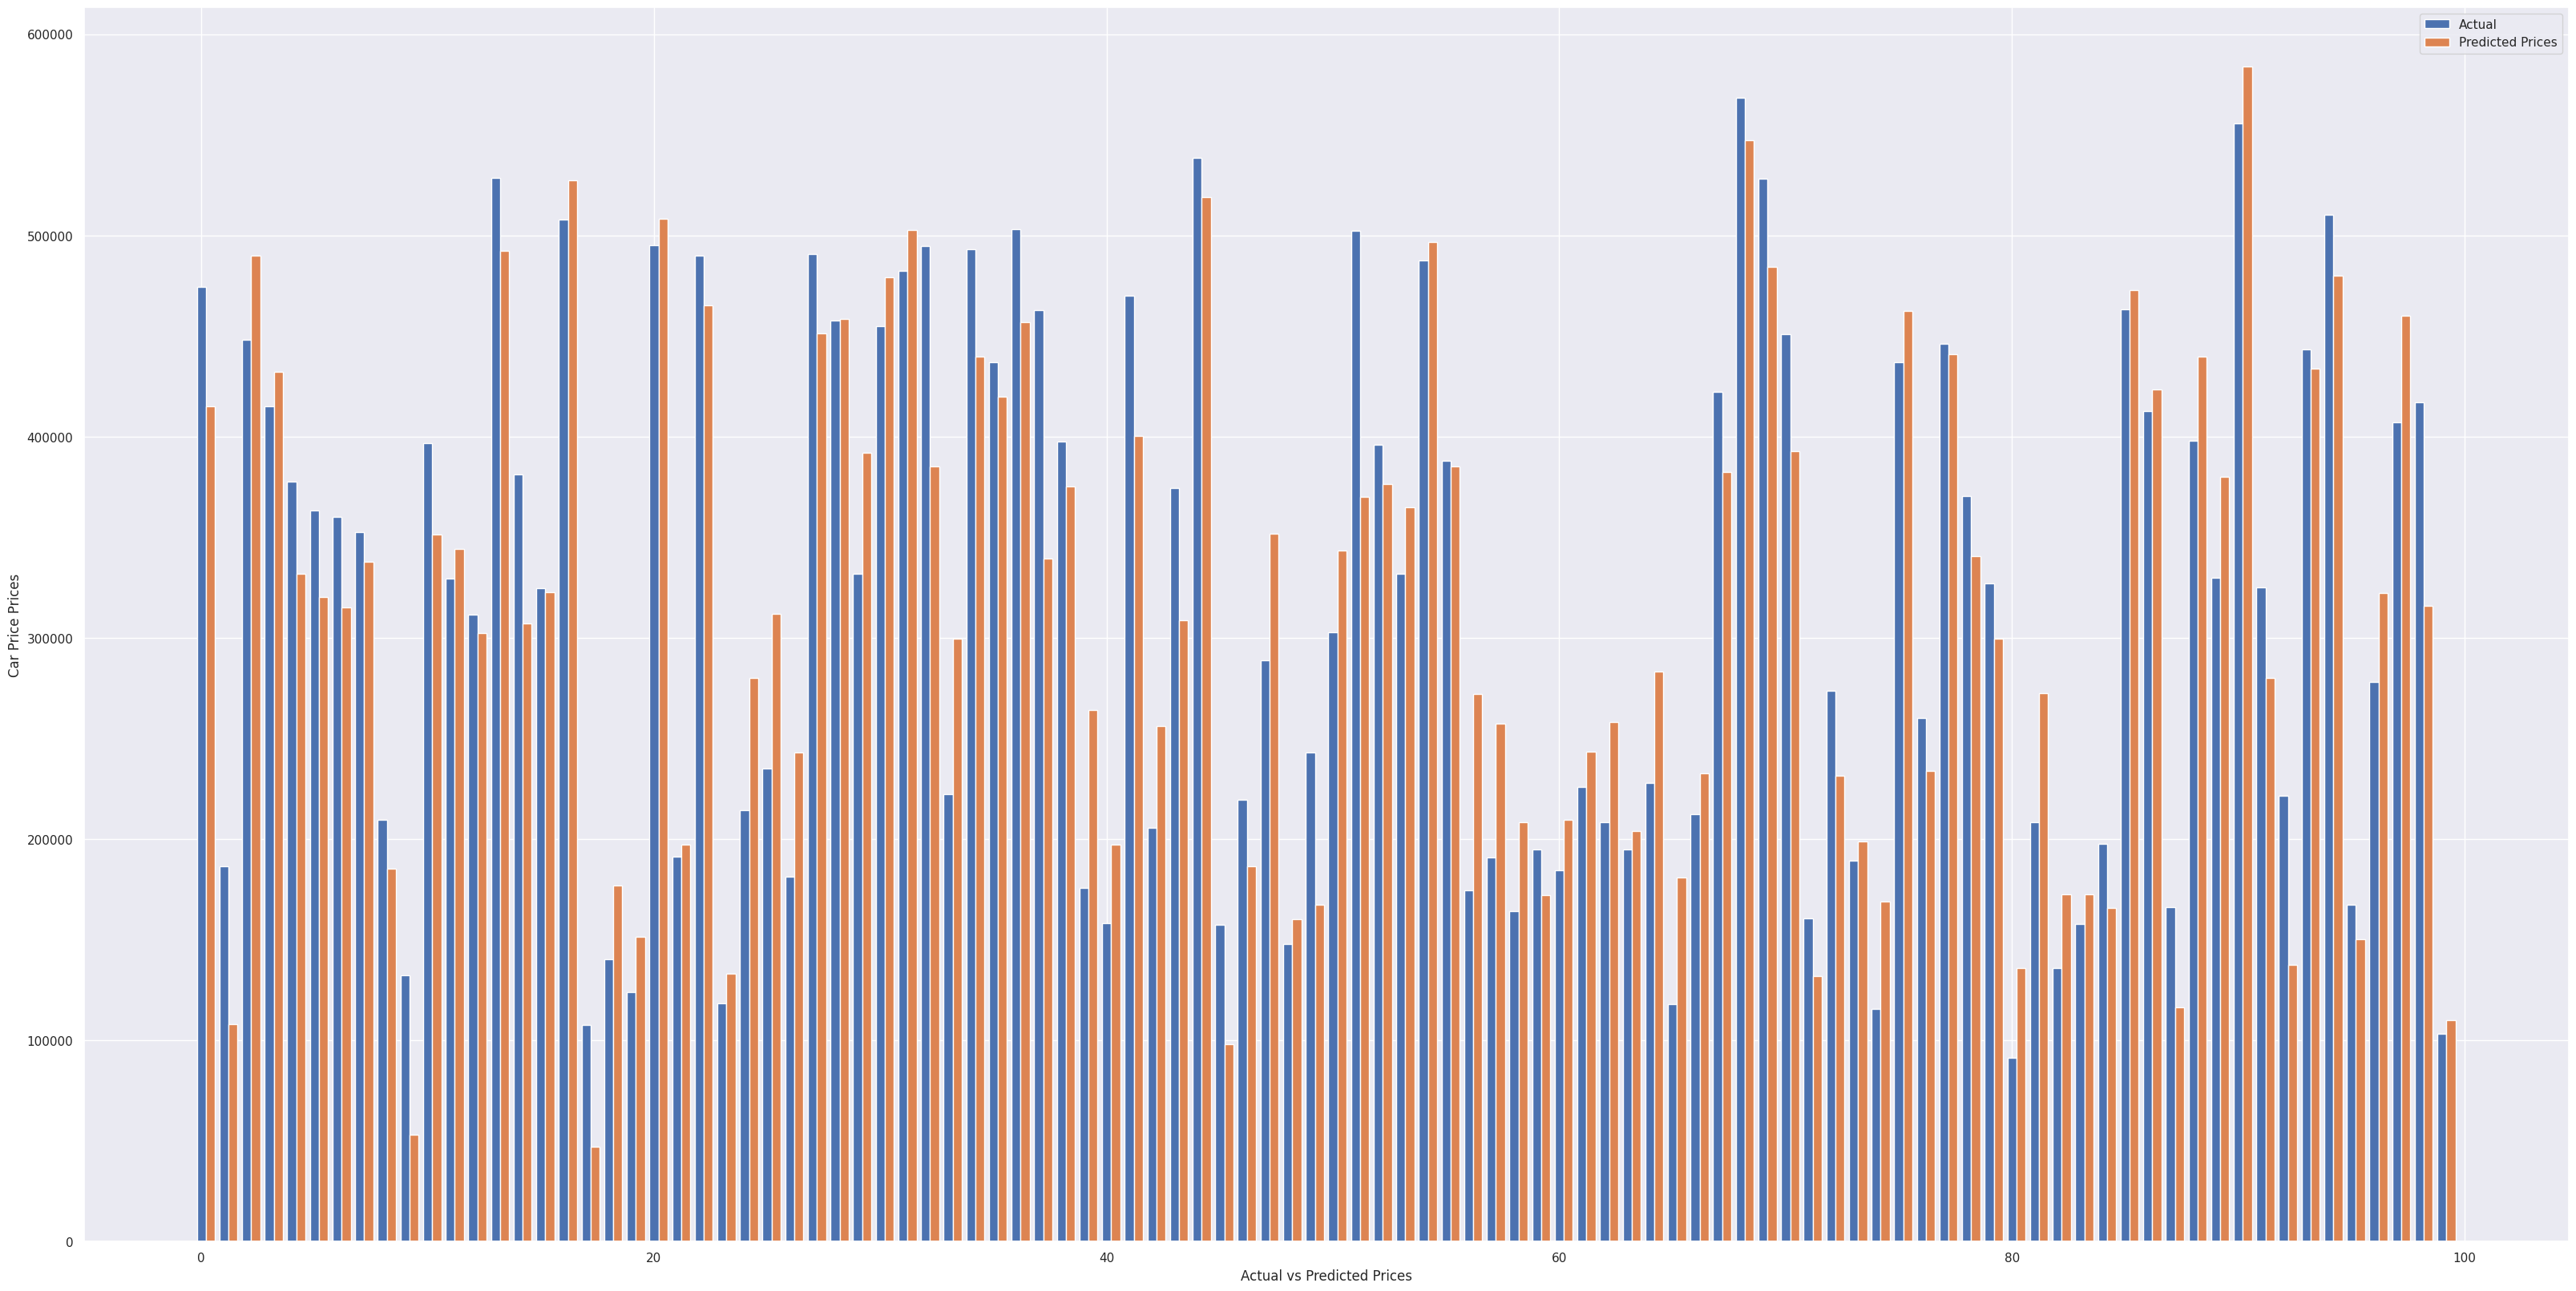

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width= 0.4
plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label="Actual Car Price")

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')


plt.legend(['Actual', 'Predicted Prices'])
plt.show()